## Analyzing Wildfire Data: Insights and Patterns from Burn Area, Weather, and Seasonal Trends  
### Assignment 


*****
This project involves exploring a dataset related to wildfires and extracting meaningful insights by answering a series of analytical questions. The primary focus is on identifying patterns in fire occurrence, weather conditions, and seasonal trends. 
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1.

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
Forest = pd.read_csv(url)
print(Forest.head(5))

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [5]:
# observations in the dataset
total_observations = Forest.shape[0]
print("Total number of observations:", total_observations)


# observations with both a signification fire (burned area > 0) and rain

#Step 1: Filter rows where the burned area is greater than 0 and there is rain
filtered_data = Forest[(Forest['area'] > 0) & (Forest['rain'] > 0)]

#Step2: Count the number of observations in the filtered data
filtered_observations = len(filtered_data)
print("Number of observations with both a significant fire and rain:", filtered_observations)

Total number of observations: 517
Number of observations with both a significant fire and rain: 2


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [9]:
filtered_data2= Forest.loc[(Forest['area'] > 0), ['month', 'day', 'area']]
print(filtered_data2)

    month  day   area
138   jul  tue   0.36
139   sep  tue   0.43
140   sep  mon   0.47
141   aug  wed   0.55
142   aug  fri   0.61
..    ...  ...    ...
509   aug  fri   2.17
510   aug  fri   0.43
512   aug  sun   6.44
513   aug  sun  54.29
514   aug  sun  11.16

[270 rows x 3 columns]


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [4]:
largest_fires = Forest.sort_values(by='area', ascending=False)
top_five_largest_fires = largest_fires.head(5)
print(top_five_largest_fires)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
236  2  2   sep  sat  92.5  121.1  674.4   8.6  18.2  46   1.8   0.0   200.94


# Q5.
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [7]:
top_five_largest_fires2= top_five_largest_fires[['month','temp', 'RH', 'wind','rain', 'area']]
print(top_five_largest_fires2)

    month  temp  RH  wind  rain     area
238   sep  25.1  27   4.0   0.0  1090.84
415   aug  27.5  27   4.9   0.0   746.28
479   jul  22.6  57   4.9   0.0   278.53
237   sep  18.8  40   2.2   0.0   212.88
236   sep  18.2  46   1.8   0.0   200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [6]:

# Step 1: Create a list of month names in order
months_order= ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#step 2: Convert the 'month' column to a categorical type
Forest['month'] = pd.Categorical(Forest['month'], categories=months_order, ordered=True)
print(Forest['month'].head())

0    mar
1    oct
2    oct
3    mar
4    mar
Name: month, dtype: category
Categories (12, object): ['jan' < 'feb' < 'mar' < 'apr' ... 'sep' < 'oct' < 'nov' < 'dec']


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [7]:

#METHOD 1:
New_Forest_Data= Forest.copy()
New_Forest_Data['Fire_Occurred'] = New_Forest_Data['area'].apply(lambda x: 'TRUE' if x > 0 else 'FALSE')
print(New_Forest_Data.head())


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  Fire_Occurred  
0         FALSE  
1         FALSE  
2         FALSE  
3         FALSE  
4         FALSE  


In [10]:
#METHOD 2
# Setp 1: Add a new column
Forest['fire_occurred'] = Forest['area'] > 0

#step2: convert added coloumn to string
Forest['fire_occurred']= Forest['fire_occurred'].astype(str)

#step3: Replace 'True' with 'TRUE' and 'False' with 'FALSE'
Forest['fire_occurred'] = Forest['fire_occurred'].str.upper()
print(Forest.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  fire_occurred  
0         FALSE  
1         FALSE  
2         FALSE  
3         FALSE  
4         FALSE  


# Q8.
What is the mean area/wind/temp/RH per month? (10 points)

In [19]:
#Step1: group data by months
group_data= Forest.groupby('month')

#MEAN OF Area/wind/temp/RH
mean_area_per_month = group_data[['area', 'wind', 'temp', 'RH']].mean()
print(mean_area_per_month)



            area      wind       temp         RH
month                                           
jan     0.000000  2.000000   5.250000  89.000000
feb     6.275000  3.755000   9.635000  55.700000
mar     4.356667  4.968519  13.083333  40.000000
apr     8.891111  4.666667  12.044444  46.888889
may    19.240000  4.450000  14.650000  67.000000
jun     5.841176  4.135294  20.494118  45.117647
jul    14.369687  3.734375  22.109375  45.125000
aug    12.489076  4.086413  21.631522  45.489130
sep    17.942616  3.557558  19.612209  42.843023
oct     6.638000  3.460000  17.093333  37.466667
nov     0.000000  4.500000  11.800000  31.000000
dec    13.330000  7.644444   4.522222  38.444444


<ipython-input-19-938cb6b8510f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data= Forest.groupby('month')


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64


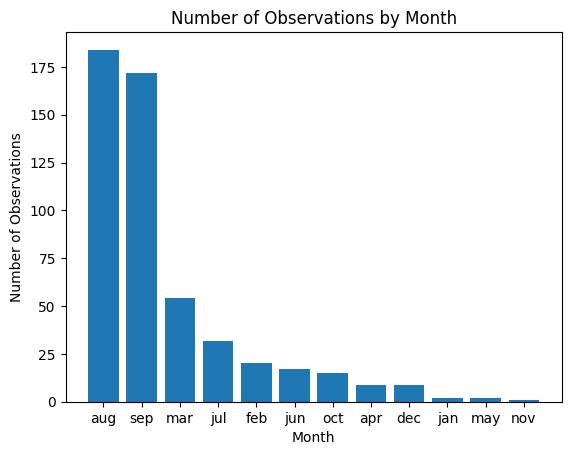

In [39]:
#Step1: create a df that counts the number of observations
obserations_per_month= Forest['month'].value_counts(ascending=False)

print(obserations_per_month)

# Get x and y data for the bar plot
x = obserations_per_month.index
y = obserations_per_month.values

# Create the bar plot with both x and y values
plt.bar(x, y)
plt.title('Number of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.show()


# Q10.
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

month
aug    99
sep    97
mar    19
jul    18
feb    10
dec     9
jun     8
oct     5
apr     4
may     1
jan     0
nov     0
Name: count, dtype: int64


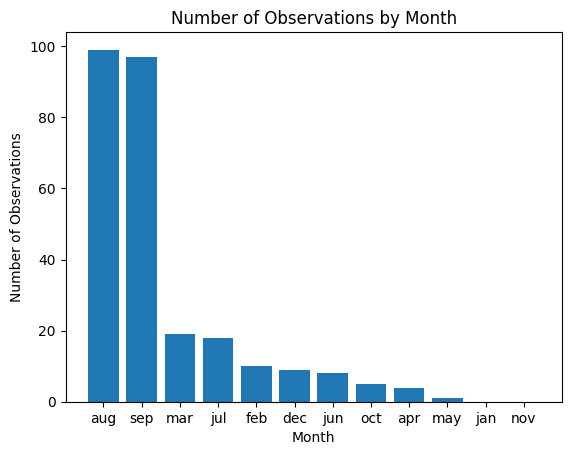

In [42]:
#Step1: create a df where only burned area is greater than > 0
filtered_data = Forest[Forest['area'] > 0]

#Step2: create a df that counts the number of observations
new_frame= filtered_data['month'].value_counts(ascending=False)

print(new_frame)

# Get x and y data for the bar plot
x = new_frame.index
y = new_frame.values

# Create the bar plot with both x and y values
plt.bar(x, y)
plt.title('Number of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.show()




This is the end of this Assignment 

